# Predicting Bike Sharing Demand Using Linear Regression

## `Dataset Overview:`
Bike-sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people can rent a bike from one location and return it to a different place on an as-needed basis.

The data generated by these systems makes them attractive  for researchers because the duration of travel, departure location, arrival location, and time elapsed are explicitly recorded.
In this assignment, you’re asked to combine historical usage patterns with weather data to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

### Columns description:

1_Datetime: hourly date + timestamp
    
2_Season:1 = spring,2 = summer,3 = fall,4 = winter
    
3_Holiday - whether the day is considered a holiday

4_working day - whether the day is neither a weekend nor holiday

5_Weather:

       1: Clear, Few clouds, Partly cloudy, Partly cloudy
       
       2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds,
          Mist
       
       3: Light Snow,Light Rain +Thunderstorm +Scattered clouds,
          Light Rain + Scattered clouds
       
       4: Heavy Rain + Ice Pallets + Thunderstorm + Mist,
          Snow + Fog

6_Temp - temperature in Celsius

7_Atemp - "feels like" temperature in Celsius

8_Humidity - relative humidity

9_Windspeed - wind speed

10_Casual - number of non-registered user rentals initiated

11_Registered - number of registered user rentals initiated

12_Count - number of total rentals

#### Step_1 Import the necessary libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#### Step_2 Reading and understanding the data

In [77]:
#read the data
bike=pd.read_csv("BikeSharingAssignment.csv")
bike.head()# Display the first 5 rows 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [78]:
#View the number of rows and columns
bike.shape

(10886, 12)

In [79]:
# Understanding the feature names in the datase
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [80]:
# Getting insights of the features
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [81]:
# Summary of the dataset: 10886 rows, 12 columns, no null values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [82]:
# Check for duplicates
bike.duplicated().sum()

0

There are no missing value and no duplicates the data looks ok

In [83]:
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

#### Understanding the Data Dictionary and parts of Data Preparation:
زيادة مني عشان بدي افهم الخطوة ولما اجي احول يكون الاشي مفهوم

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [84]:
# Assigning string values to different seasons instead of numeric values. 
# 1=spring
bike.loc[(bike['season'] == 1) , 'season'] = 'spring'

# 2=summer
bike.loc[(bike['season'] == 2) , 'season'] = 'summer'

# 3=fall
bike.loc[(bike['season'] == 3) , 'season'] = 'fall'

# 4=winter
bike.loc[(bike['season'] == 4) ,'season'] = 'winter'

In [85]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
bike['season'].astype('category').value_counts()

winter    2734
fall      2733
summer    2733
spring    2686
Name: season, dtype: int64

In [86]:
# Encoding Categorical Variables
categorical_columns = ['season', 'weather','holiday','workingday']

In [87]:
# whether day is a holiday or not (0: No, 1: Yes)
bike['holiday'].astype('category').value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [88]:
bike['workingday'].astype('category').value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [89]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
bike.loc[(bike['weather'] == 1) , 'weather'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bike.loc[(bike['weather'] == 2) , 'weather'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bike.loc[(bike['weather'] == 3) , 'weather'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike.loc[(bike['weather'] == 4) , 'weather'] = 'D'

In [90]:
# Extracting the type of weather situations present in the data
bike['weather'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [91]:
# Taking count based on weather situations
bike['weather'].astype('category').value_counts()

A    7192
B    2834
C     859
D       1
Name: weather, dtype: int64

In [92]:
bike.dtypes

datetime      datetime64[ns]
season                object
holiday                int64
workingday             int64
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

خلال EDA: اترك الفئات كـ object للحصول على تحليل أوضح وأسهل

بعدEDA: قم بالترميز لتجهيز البيانات للنماذج التي تحتاج إلى بيانات رقمية

##### 2. Exploratory Data Analysis (EDA)

In [93]:
print("Statistical Description of the Target Variable:")
print(bike['count'].describe())

Statistical Description of the Target Variable:
count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


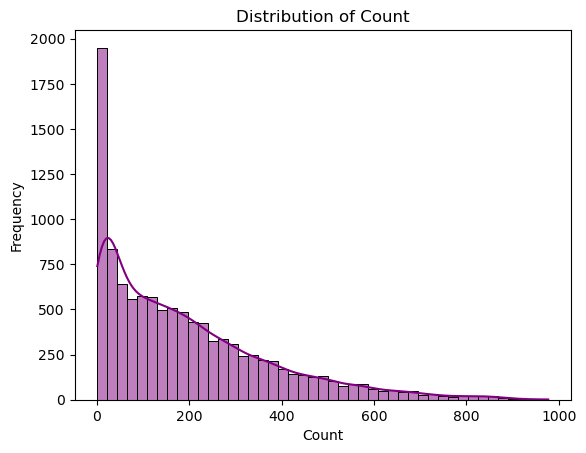

In [94]:
sns.histplot(bike['count'], kde=True, color='purple')
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()


This histogram shows the distribution of bike rental counts (Count). The data is highly skewed to the right, with most rental counts being low, while fewer instances have high rental counts.

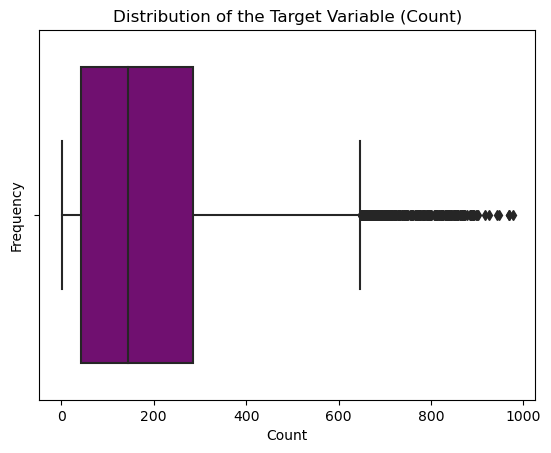

In [95]:
sns.boxplot(x='count', data=bike,color='purple')
plt.title('Distribution of the Target Variable (Count)')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()


From the boxplot of count column ,it shows that the data is right-skewed, with most values concentrated at lower counts. The presence of several outliers on the right side indicates instances with unusually high rental counts compared to the rest of the data.

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

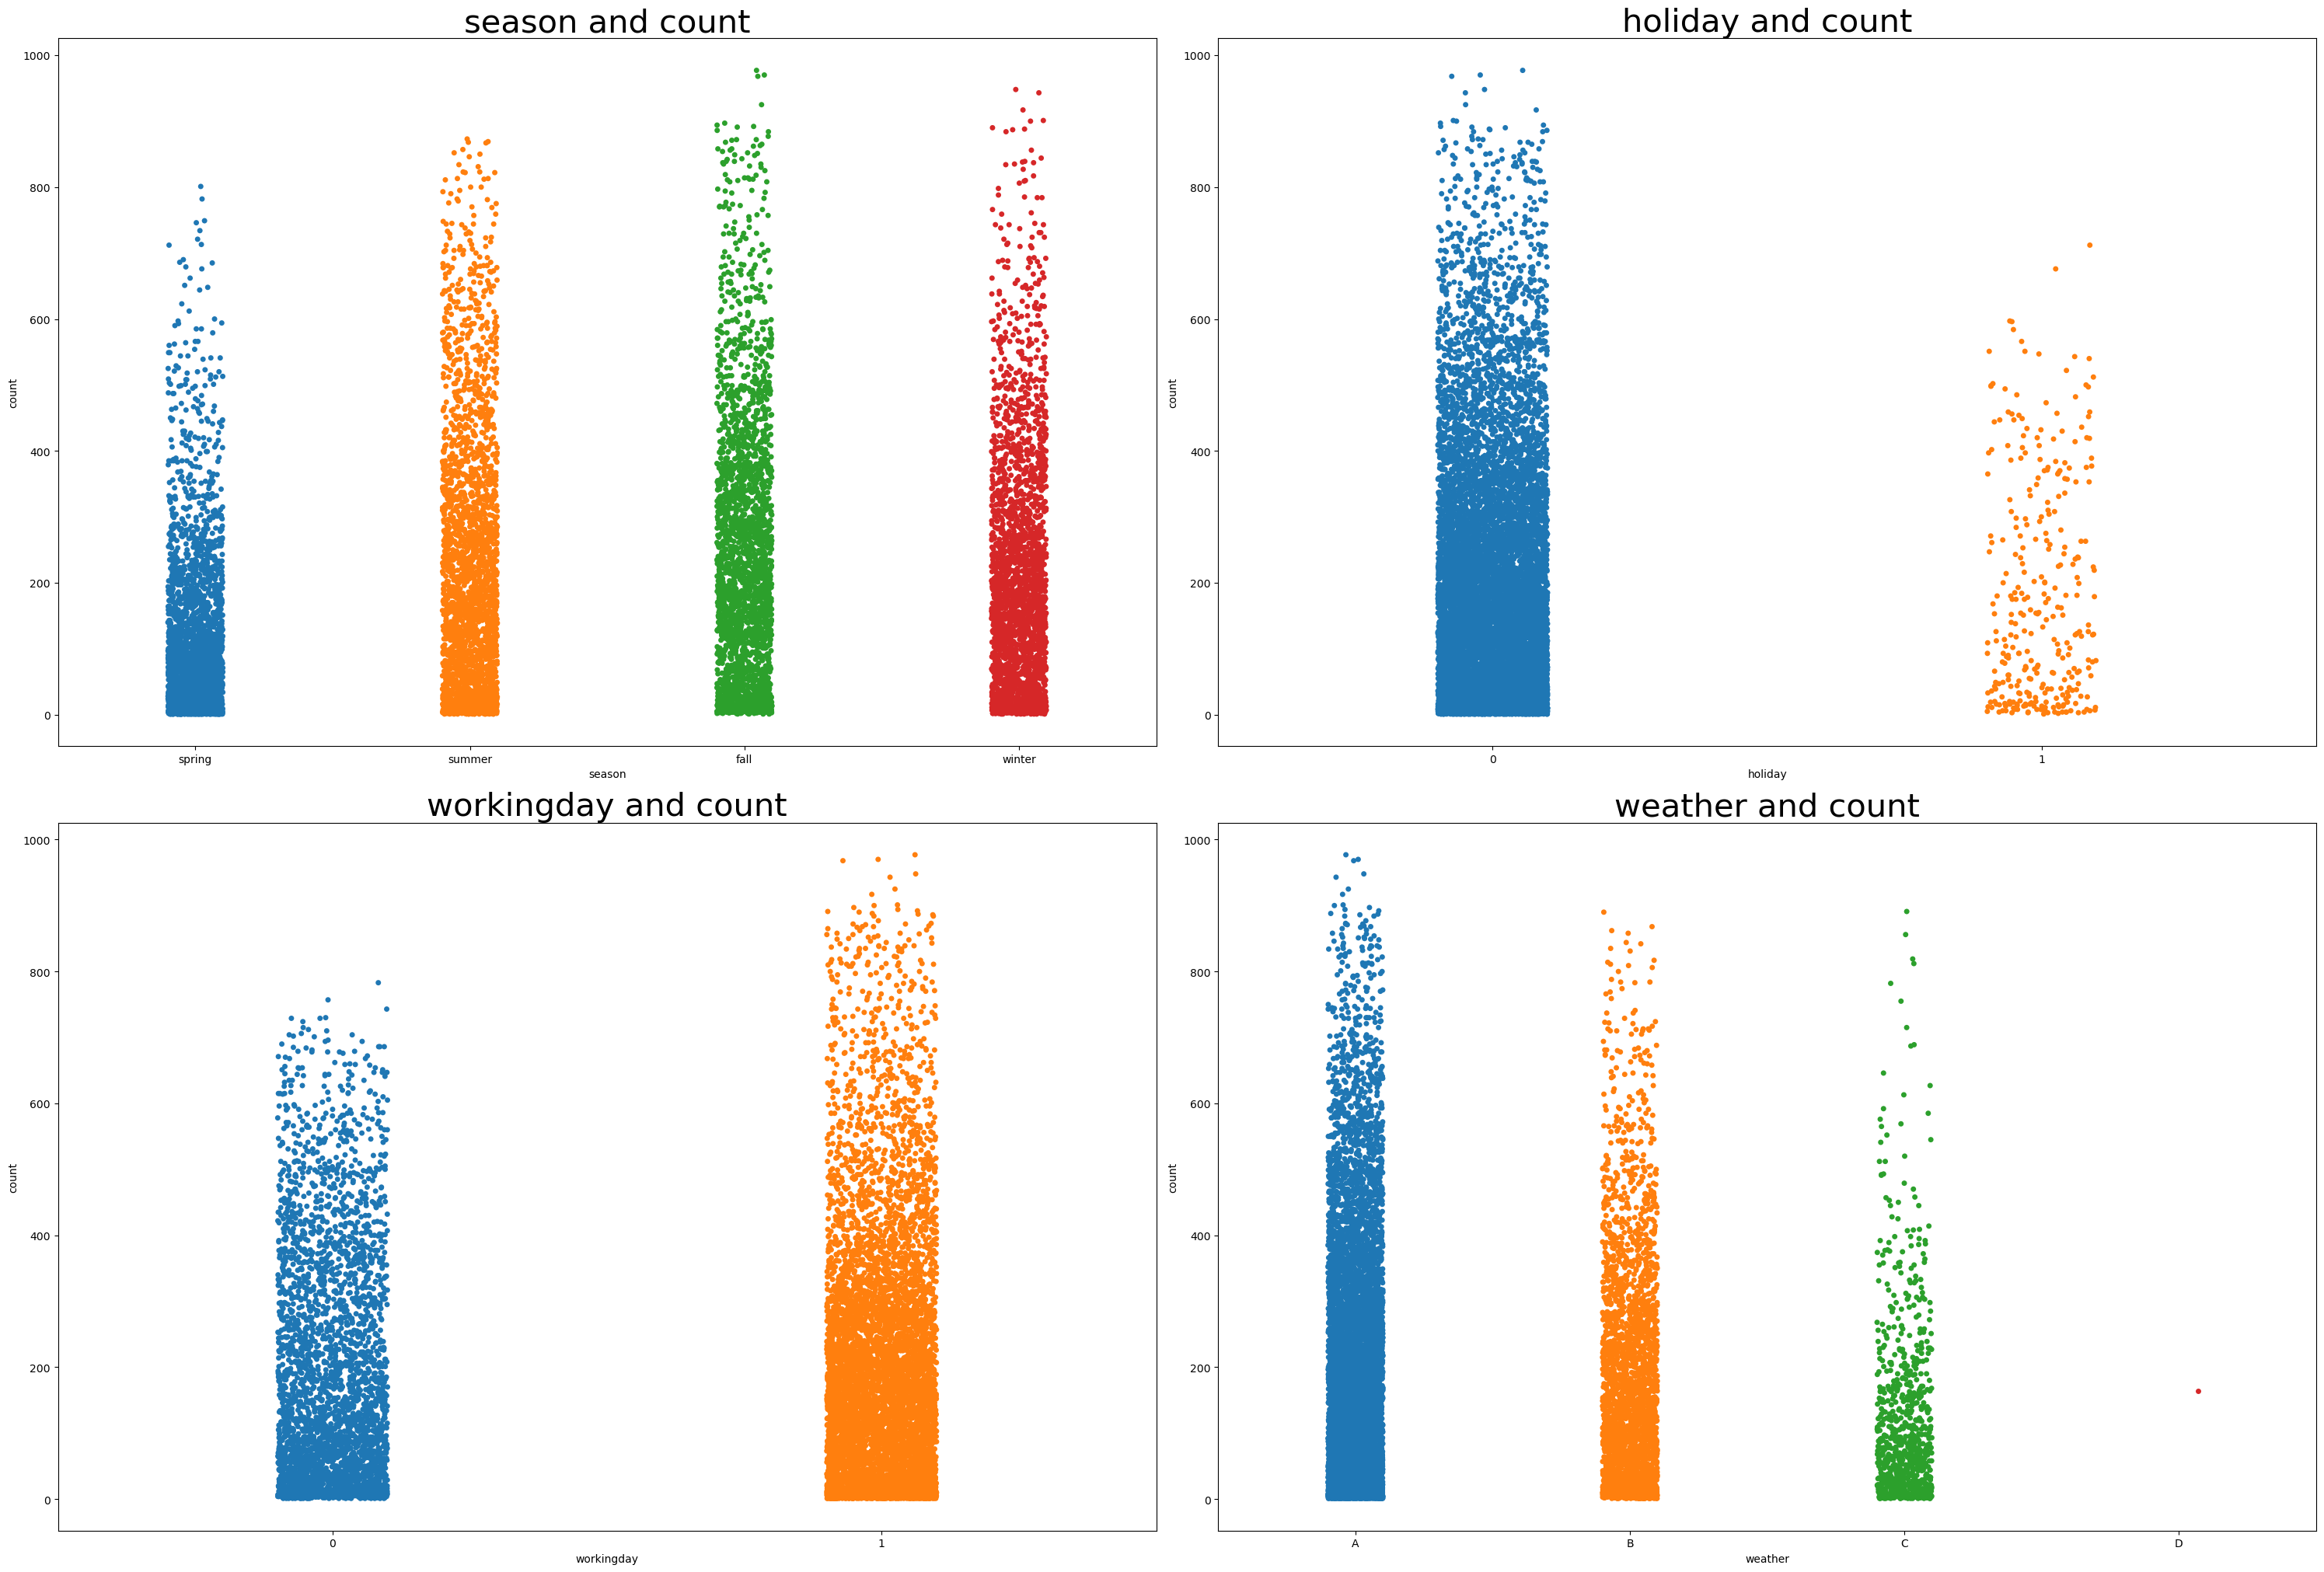

In [96]:
plt.figure(figsize=(30,30))

plt.subplot(3,2,1)
sns.stripplot(x = 'season', y = 'count', data = bike)
plt.title("season and count", fontsize=30)

plt.subplot(3,2,2)
sns.stripplot(x = 'holiday', y = 'count', data = bike)
plt.title("holiday and count", fontsize=30)

plt.subplot(3,2,3)
sns.stripplot(x = 'workingday', y = 'count', data = bike)
plt.title("workingday and count", fontsize=30)

plt.subplot(3,2,4)
sns.stripplot(data=bike, x='weather', y='count', jitter=True)
plt.title("weather and count", fontsize=30)

plt.tight_layout()  # لضبط المسافات بين الرسومات
plt.show()


Visualising Numeric Variables:
    
Let's make a scatterplot of all the numeric variables:

[temp , atemp , humidity , windspeed , casual , registered ]


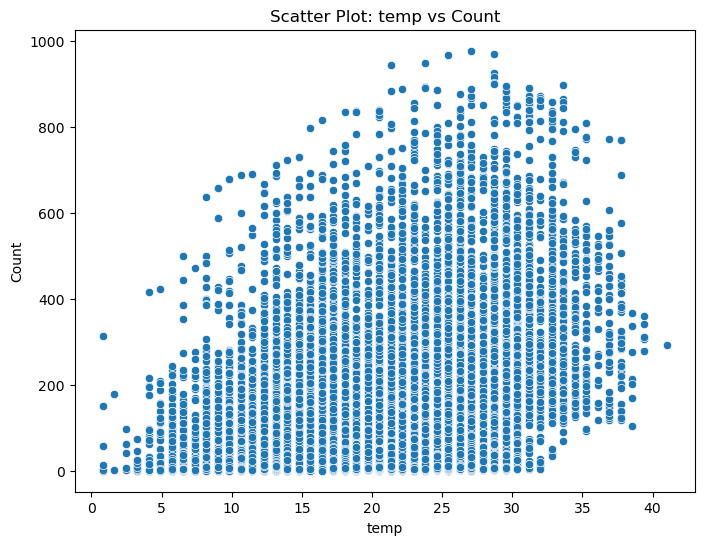

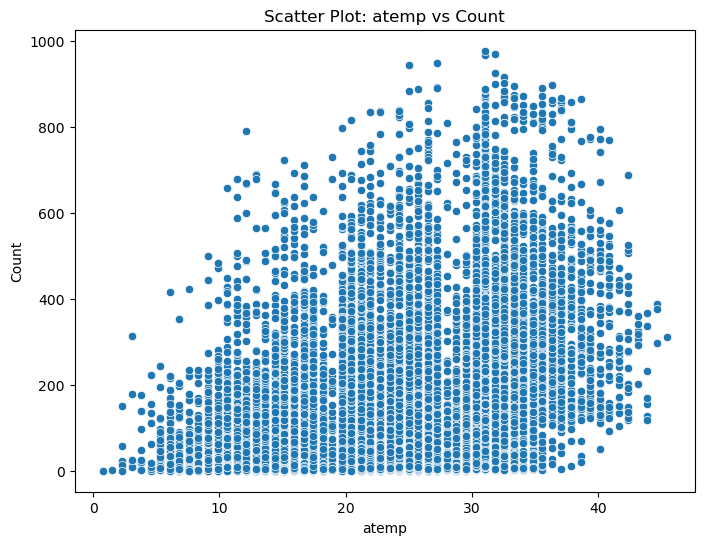

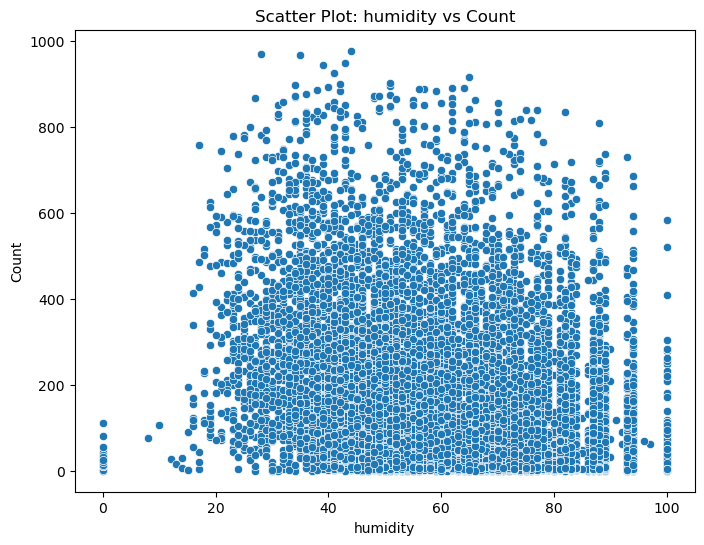

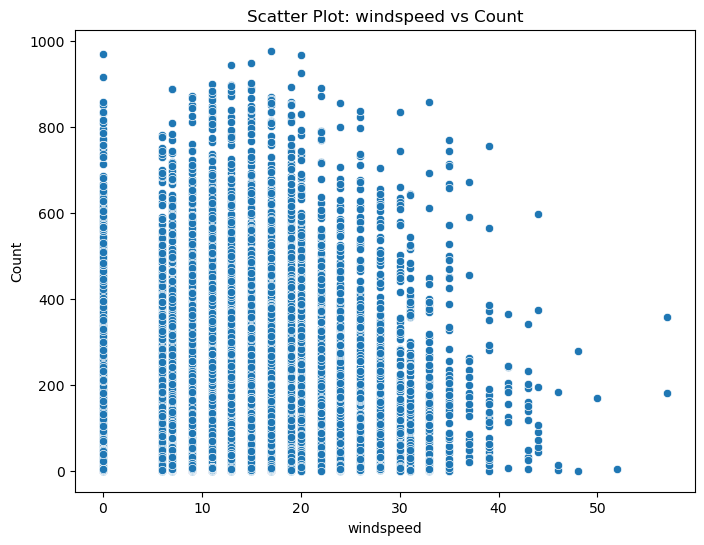

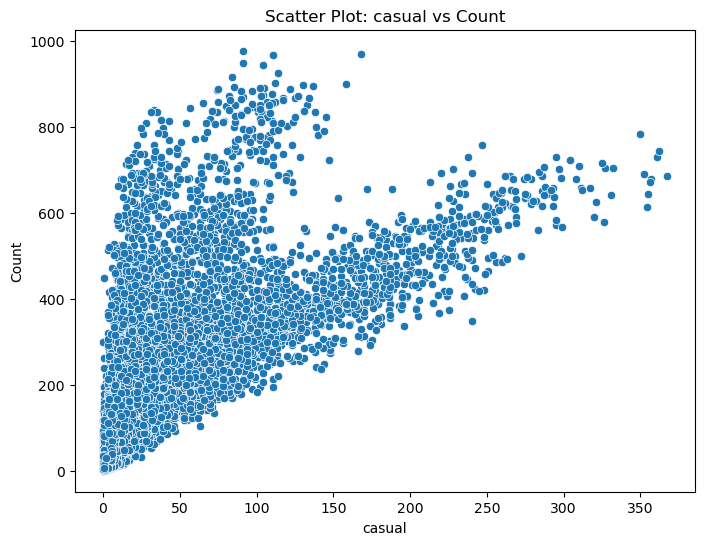

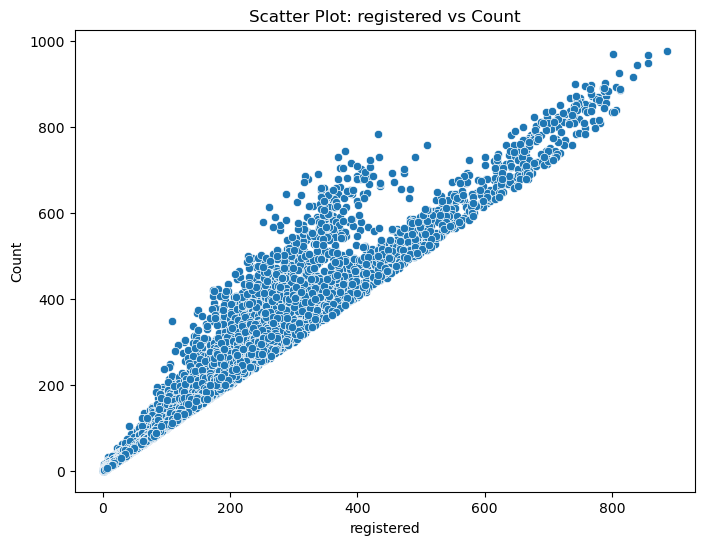

In [97]:
# Selecting only numeric variables
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

# Bar Plot for temp vs count
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=bike, x=col, y='count')
    plt.title(f'Scatter Plot: {col} vs Count')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

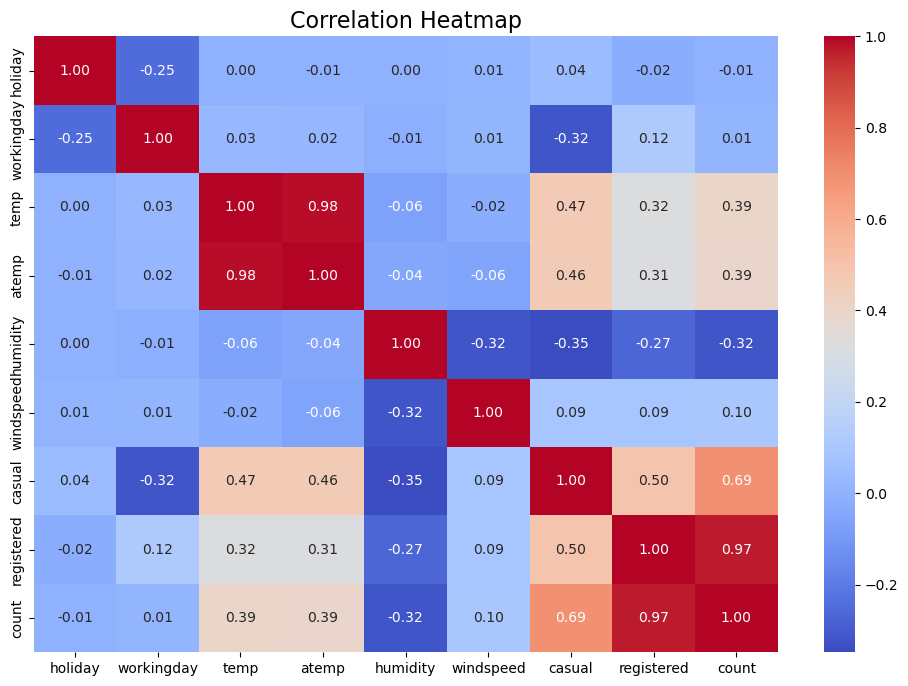


Top Features Correlated with 'Count':
humidity     -0.317371
holiday      -0.005393
workingday    0.011594
windspeed     0.101369
atemp         0.389784
temp          0.394454
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64


In [98]:
#3. Correlation Analysis
# إنشاء مصفوفة الارتباط
correlation_matrix = bike.corr()

# عرض خريطة الحرارة
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# عرض العلاقات الأقوى مع المتغير المستهدف
print("\nTop Features Correlated with 'Count':")
print(correlation_matrix['count'].sort_values(ascending=True).head(19))


Highly Correlated Features:

1_registered (0.97): Strongest positive correlation, indicating most 
rentals come from registered users.

2_casual (0.69): Also positively correlated but less than registered users.

3_Moderately Correlated Features:

temp (0.39) and atemp (0.38): Rentals increase with higher temperatures.

4_Negatively Correlated Feature:

humidity (-0.31): Higher humidity is associated with fewer rentals.

5_Least Impactful Features:

holiday (-0.005) and workingday (0.01): Minimal impact on rental counts.

##### Summary:
User type (registered and casual) and weather conditions (temperature and humidity) are the most influential factors, while holidays and working days have negligible effects.

#### 3. Encode Categorical Variables:

○ Convert categorical variables into a numerical format using encoding
techniques (e.g., one-hot encoding).

In [99]:
# Convert into dummies
bike = pd.get_dummies(bike, columns=['season'], drop_first=True)
bike = pd.get_dummies(bike, columns=['weather'], drop_first=True)
'''
drop_first=True?
لتجنب Dummy Variable Trap
إحدى هذه الفئات يمكن تحديدها من خلال قيم الأعمدة الأخرى (لأنها تعتمد عليها خطيًا)
'''
bike.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_spring,season_summer,season_winter,weather_B,weather_C,weather_D
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,0,0


#### 3. Feature Engineering:

1. Create New Features:

        ○ Generate at least one new feature from the existing data

In [100]:
bike['hour'] = bike['datetime'].dt.hour
bike['hour_sin'] = np.sin(2 * np.pi * bike['hour'] / 24)
bike['hour_cos'] = np.cos(2 * np.pi * bike['hour'] / 24)
bike['windspeed_squared'] =bike['windspeed'] ** 2
bike['Temp_atemp'] = bike['temp'] - bike['atemp']

Explain how the new feature might improve model performance. The temperature difference might capture additional variance related to the discomfort felt by users, influencing rental behavior.

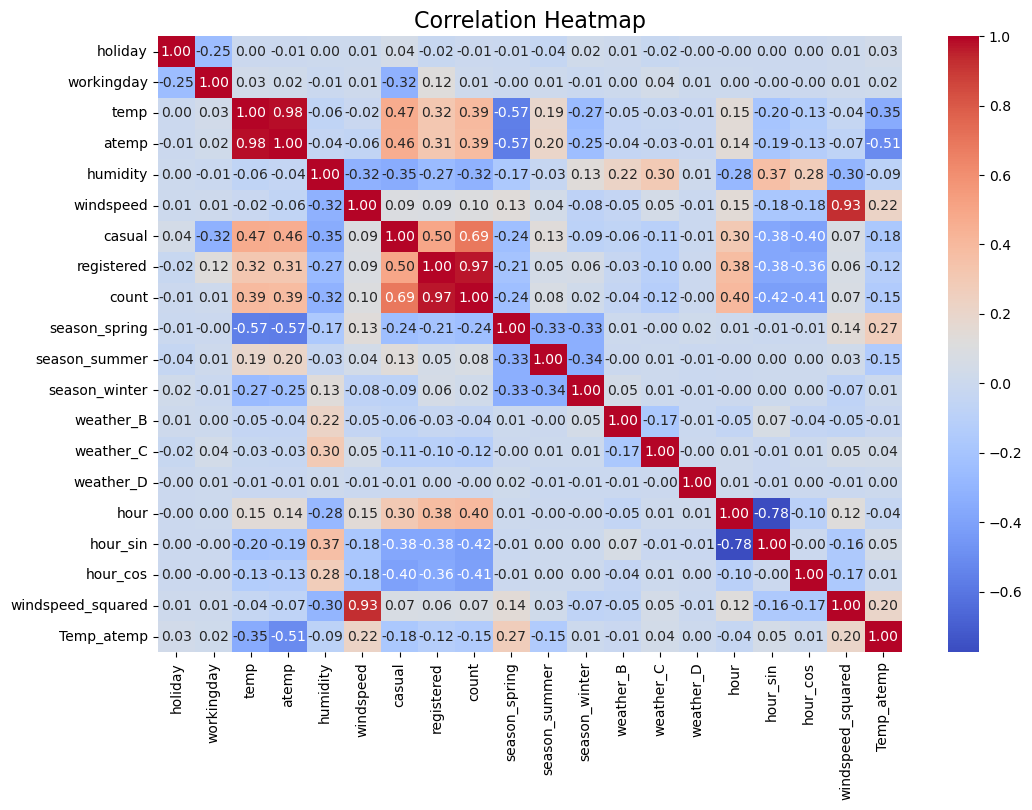


Top Features Correlated with 'Count':
hour_sin            -0.418138
hour_cos            -0.413897
humidity            -0.317371
season_spring       -0.237704
Temp_atemp          -0.146716
weather_C           -0.117519
weather_B           -0.041329
holiday             -0.005393
weather_D           -0.001459
workingday           0.011594
season_winter        0.023704
windspeed_squared    0.073482
season_summer        0.075681
windspeed            0.101369
atemp                0.389784
temp                 0.394454
hour                 0.400601
casual               0.690414
registered           0.970948
Name: count, dtype: float64


In [101]:
#3. Correlation Analysis
# إنشاء مصفوفة الارتباط
correlation_matrix = bike.corr()

# عرض خريطة الحرارة
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# عرض العلاقات الأقوى مع المتغير المستهدف
print("\nTop Features Correlated with 'Count':")
print(correlation_matrix['count'].sort_values(ascending=True).head(19))


##### Impact of the Hour Feature on the Model:

The "Hour" feature is a critical addition for analyzing temporal patterns in bike rental data. Based on the plot, it is evident that rental counts vary significantly throughout the day:

1_Peak Hours: There are two distinct peaks in the morning (7-9 AM) and evening (4-7 PM), likely due to commuting for work or school.

2_Low-Demand Hours: Rentals drop significantly during the late-night and early morning hours (midnight to 5 AM).

3_Stable Hours: Rentals remain relatively consistent during the daytime (10 AM - 3 PM).


`Adding the "Hour" feature greatly enhances the model's predictive accuracy as it helps capture the daily patterns influencing rental behavior. This leads to improved performance metrics such as MAE and R² Score. Without this feature, the model would struggle to account for these temporal variations, resulting in less accurate predictions`

##### 4. Build and Evaluate a Linear Regression Model:
1. Train-Test Split:

2. Train the Model:
       ○ Train a Linear Regression model on the training data.

In [231]:
from sklearn.model_selection import train_test_split
features=['atemp', 'hour_sin', 'hour_cos', 'weather_C','Temp_atemp','weather_B','season_winter','windspeed_squared','workingday','season_spring','hour']               
# Define features (X) and target (y)
Y = bike['count']  # العمود المستهدف
X = bike.drop(columns=['count','registered','datetime','holiday','temp'])
# Split the data (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [232]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)

LinearRegression()

3. Evaluate the Model 

○ Use metrics like MAE, RMSE, and R2 Score to assess performance.

○ Plot and interpret residuals to evaluate how well the model fits the data.

In [233]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# "Feature scaling"
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# "Applying Lasso"
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train_scaled, Y_train)

# "Feature importance extraction"
lasso_coefficients = lasso.coef_

# "Feature importance"
for feature, coef in zip(X.columns, lasso_coefficients):
    if coef != 0:
        print(f"{feature}: {coef}")


workingday: 38.8365328566279
atemp: 7.027331825096487
humidity: 4.287636756743555
windspeed: 10.239339990845044
casual: 103.38330011711884
season_spring: -9.325041092108403
season_summer: -2.4641158797157554
season_winter: 11.203423530438466
weather_B: -4.814011873905374
weather_D: -0.19959613276406357
hour: 28.00758690571754
hour_sin: -15.762501793923574
hour_cos: -36.21735697701964
windspeed_squared: -10.026821298712171
Temp_atemp: 2.6873948765227307


In [234]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Make predictions
Y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 78.14889205004135
RMSE: 108.16259072379431
R² Score: 0.6259441912253001


The model performs well, providing an acceptable level of prediction accuracy, but it is not perfect. Although the R² score is relatively good, indicating that the model can explain 63% of the variance in the data, there is still room for improvement in its predictive power.

Conclusion:
The model is adequately capturing patterns in the data, but it could be further optimized for better accuracy and lower error margins. If you're satisfied with the current performance, the model can be used as is. However, additional adjustments could be made to improve its results

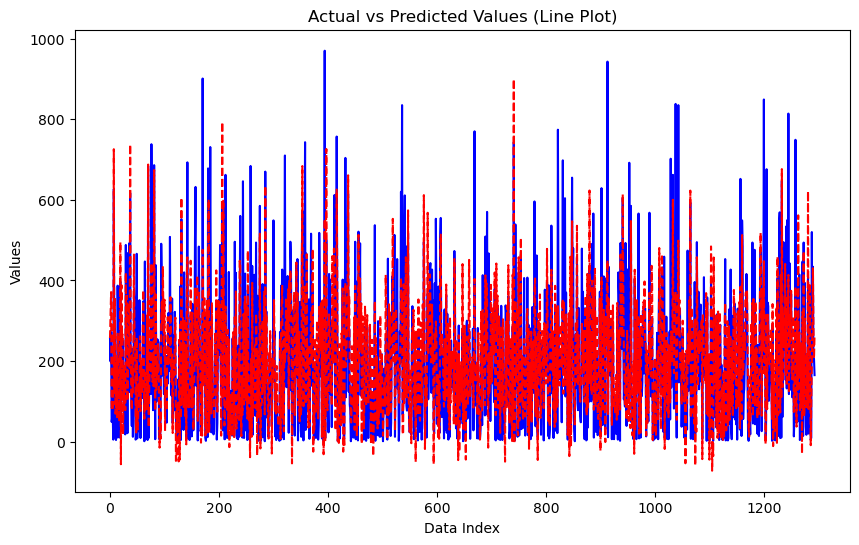

In [240]:

# Line plot (if needed)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Actual', color='blue')
plt.plot(np.arange(len(Y_pred)), Y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Line Plot)')
plt.xlabel('Data Index')
plt.ylabel('Values')
plt.show()

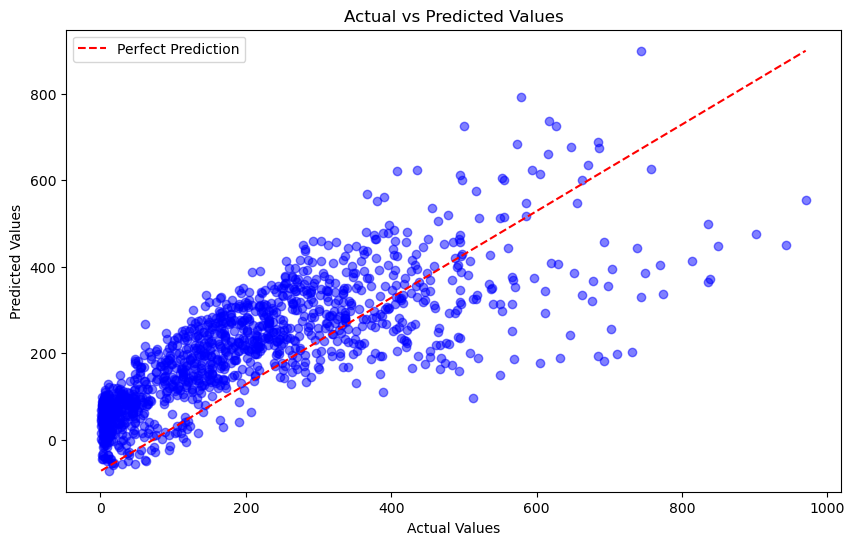

In [239]:
# Assuming y_test is the actual values and y_pred are the predicted values
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_pred), max(Y_pred)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

